<a href="https://colab.research.google.com/github/HienNguyenMinh/PythonAssignment/blob/main/BaiTap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M5 EDA - Vẽ Các Biểu Đồ

**Tải các tệp dữ liệu từ Google Drive về Colab**

In [10]:
#Install gdown
!pip uninstall gdown -y && pip install gdown
#Tạo một folder "DataSet" trên Colab
!rm -rf /content/M5Forecasting
!mkdir M5Forecasting
#Tải các tệp dữ liệu lớn từ Google Drive
!gdown --folder https://drive.google.com/drive/folders/1YgxRFChKTJ5EHStqR_dNvJCd_2HibWll?usp=sharing -O /content/M5Forecasting


Found existing installation: gdown 4.5.3
Uninstalling gdown-4.5.3:
  Successfully uninstalled gdown-4.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gdown-4.5.3-py3-none-any.whl
Retrieving folder list
Processing file 1nJoIt6-nl7YOgqusRLxUZTFgOa1EmsW0 calendar.csv
Processing file 1cuEGsxjYBISrMMq8d52um_MzGTZcqyTq sales_train_evaluation.csv
Processing file 1swX4_vKU7hl6wmLQjod_EUFf3ztNgdq2 sales_train_validation.csv
Processing file 1GCf2ElYJR4Z6tBFD1BbhrvQE75wvwB1Y sample_submission.csv
Processing file 1WVPd8CnbqF65IBT2gBxLBk4yyCiJ8Psg sell_prices.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1nJoIt6-nl7YOgqusRLxUZTFgOa1EmsW0
To: /content/M5Forecasting/calendar.csv
100% 103k/103k [00:00<00:00, 91.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cuEGsxjYBISrMMq8d52um_MzGTZcqyTq
To: /content/M5Foreca

In [12]:
# Import các thư viện cần thiết
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Kiểm tra các file dữ liệu *.csv được tải về Colab thông qua việc duyệt cây thư mục vừa được tải về Colab và in ra đường dẫn các file dữ liệu:
import os
for dirname, _, filenames in os.walk('/content/M5Forecasting'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/M5Forecasting/sales_train_evaluation.csv
/content/M5Forecasting/calendar.csv
/content/M5Forecasting/sell_prices.csv
/content/M5Forecasting/sample_submission.csv
/content/M5Forecasting/sales_train_validation.csv


In [13]:
#Đọc dữ liệu từ các file *.csv
sale2 = pd.read_csv('/content/M5Forecasting/sales_train_validation.csv')
cale4 = pd.read_csv('/content/M5Forecasting/calendar.csv')
prices = pd.read_csv('/content/M5Forecasting/sell_prices.csv')

In [14]:
#In 3 dòng dữ liệu đầu tiên trong dataframe
sale2.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


**Đổi tên các cột của sale2 (sales_train_validation)**

Tên cột d_* đổi về ngày tương ứng


In [16]:
import datetime
x = datetime.date(2011,1,29)
for c in ((sale2.columns)[6:]):
    sale2.rename(columns={c:x},inplace=True)
    x = x + datetime.timedelta(days=1)

sale2.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


**Vẽ biểu đồ biểu diễn lịch sử bán hàng của 5 item đầu tiên theo time series**

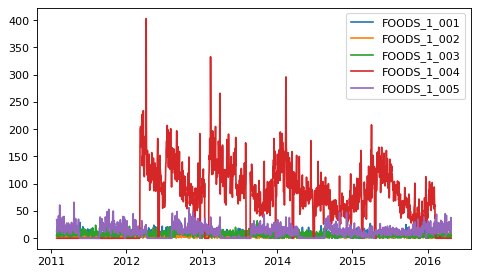

In [19]:
X = sale2.groupby('item_id')[(sale2.columns)[6:]].sum()
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(5):
    plt.plot(X.iloc[i,:],label=X.index[i])
    plt.legend(loc='best')
plt.show()